<a href="https://colab.research.google.com/github/GabriVini/DataMining/blob/main/KNN_BLOBS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load libraries

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

No handles with labels found to put in legend.


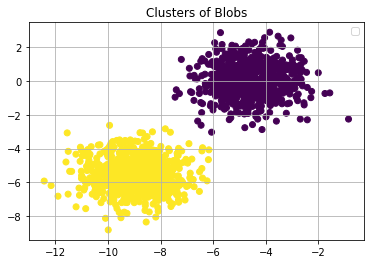

[[-3.39818746 -0.51442571]
 [-3.98167804  0.14558251]
 [-9.70582316 -4.81551856]
 ...
 [-3.74900078 -1.13258082]
 [-5.12442794 -0.0584514 ]
 [-8.19110077 -5.85989015]]
[1 1 0 ... 1 1 0]


In [ ]:
# Make blobs
n_samples = 1500
random_state = 170
# standard deviation controls spread of points around the centroids 
c_std=[1,1]
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2,n_features=2,cluster_std=c_std)

# Number of clusters
k=2
kmeans = KMeans(n_clusters=k, random_state=random_state)
y_pred = kmeans.fit_predict(X)

#plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Clusters of Blobs")
plt.legend()
plt.grid(True)
plt.show()

print(X)
print(y)

In [ ]:

# Create standardizer
standardizer = StandardScaler()
# Standardize features
features_standardized = standardizer.fit_transform(X)
features_standardized = features_standardized.reshape(-1, 1)

# print(features_standardized)

# print(features_standardized.shape)

# Two nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=2).fit(features_standardized)


# Create an observation
new_observation = np.array([ 1, 1])

new_observation = new_observation.reshape(-1, 1)


# Find distances and indices of the observation's nearest neighbors
distances, indices = nearest_neighbors.kneighbors(new_observation)
# View the nearest neighbors

print(indices)


[[1567 1482]
 [1567 1482]]


In [ ]:
# Find two nearest neighbors based on euclidean distance
nearestneighbors_euclidean = NearestNeighbors(n_neighbors=2, metric='euclidean').fit(features_standardized)

# View distances
distances

array([[0.00011618, 0.00097963],
       [0.00011618, 0.00097963]])

In [ ]:
# Find each observation's three nearest neighbors
# based on euclidean distance (including itself)
nearestneighbors_euclidean = NearestNeighbors(n_neighbors=3, metric="euclidean").fit(features_standardized)
# List of lists indicating each observation's 3 nearest neighbors
# (including itself)
nearest_neighbors_with_self = nearestneighbors_euclidean.kneighbors_graph(features_standardized).toarray()
# Remove 1's marking an observation is a nearest neighbor to itself
for i, x in enumerate(nearest_neighbors_with_self):
  x[i] = 0
# View first observation's two nearest neighbors
nearest_neighbors_with_self[0]
print(nearest_neighbors_with_self[2])


[0. 0. 0. ... 0. 0. 0.]


In [ ]:
# Load libraries
from sklearn.neighbors import KNeighborsClassifier

# Make blobs
n_samples = 1500
random_state = 170
# standard deviation controls spread of points around the centroids 
c_std=[1,1]
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2,n_features=2,cluster_std=c_std)

# Number of clusters
k=2
kmeans = KMeans(n_clusters=k, random_state=random_state)
y_pred = kmeans.fit_predict(X)

# X = X.reshape(-1, 1)

print(X.shape)

# Create standardizer
standardizer = StandardScaler()
# Standardize features
X_std = standardizer.fit_transform(X)

print(X_std.shape)
print(X)

# Train a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_jobs=-1).fit(X_std, y)
# Create two observations
new_observations = np.array([[ 0.75, 0.75], [ 1, 1]])

print(new_observations.shape)

# Predict the class of two observations
knn.predict(new_observations)



(1500, 2)
(1500, 2)
[[-3.39818746 -0.51442571]
 [-3.98167804  0.14558251]
 [-9.70582316 -4.81551856]
 ...
 [-3.74900078 -1.13258082]
 [-5.12442794 -0.0584514 ]
 [-8.19110077 -5.85989015]]
(2, 2)


array([1, 1])

In [ ]:
# View probability each observation is one of three classes
knn.predict_proba(new_observations)

array([[0., 1.],
       [0., 1.]])

In [ ]:
# Load libraries
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
# Make blobs
n_samples = 1500
random_state = 170
# standard deviation controls spread of points around the centroids 
c_std=[1,1]
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2,n_features=2,cluster_std=c_std)

# Number of clusters
k=2
kmeans = KMeans(n_clusters=k, random_state=random_state)
y_pred = kmeans.fit_predict(X)

standardizer = StandardScaler()
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
# Create a pipeline
pipe = Pipeline([("standardizer", standardizer), ("knn", knn)])
# Create space of candidate values
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
# Create grid search
classifier = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(X, y)

In [ ]:
# Best neighborhood size (k)
classifier.best_estimator_.get_params()["knn__n_neighbors"]

1

In [ ]:
# Load libraries
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Make blobs
n_samples = 1500
random_state = 170
# standard deviation controls spread of points around the centroids 
c_std=[1,1]
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2,n_features=2,cluster_std=c_std)

# Number of clusters
k=2
kmeans = KMeans(n_clusters=k, random_state=random_state)
y_pred = kmeans.fit_predict(X)

# Create standardizer
standardizer = StandardScaler()
# Standardize features
features_standardized = standardizer.fit_transform(X)
# Train a radius neighbors classifier
rnn = RadiusNeighborsClassifier(radius=.5, n_jobs=-1).fit(features_standardized, y)
# Create two observations
new_observation = np.array([ 1, 1])
# Predict the class of two observations
rnn.predict(new_observations)

array([1, 1])